<a href="https://colab.research.google.com/github/mauricionoris/fm/blob/master/Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula: Probabilidade e Distribuições em IA**

A probabilidade é a base matemática que sustenta o **aprendizado de máquina**.  
Modelos probabilísticos ajudam algoritmos a **lidar com incerteza**, **ruído** e **dados incompletos**.  
Nesta aula veremos:

1. Conceitos fundamentais de probabilidade;  
2. A **Lei dos Grandes Números** — como a média amostral se aproxima da média real;  
3. **Distribuições de probabilidade** e sua aplicação em IA;  
4. Visualizações e simulações práticas com Python.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Probabilidade Básica

Podemos entender probabilidade como **a chance de um evento ocorrer**.  
Por exemplo, a probabilidade de tirar "cara" em uma moeda justa é 0.5.

Em IA, isso aparece quando:
- Um modelo prevê a **probabilidade** de uma imagem conter um gato;
- Uma rede neural gera **distribuições de probabilidade** sobre classes possíveis;
- Um algoritmo bayesiano atualiza crenças com base em novas evidências.

In [2]:
# Simulação de lançamento de moeda
n = 10000000
resultados = [random.choice(["Cara", "Coroa"]) for _ in range(n)]

p_cara = resultados.count("Cara") / n
p_coroa = resultados.count("Coroa") / n

In [3]:
print(f'  Probabilidade de Cara  ≈  {p_cara:.3f}')
print(f'  Probabilidade de Coroa ≈ {p_coroa:.3f}')



  Probabilidade de Cara  ≈  0.500
  Probabilidade de Coroa ≈ 0.500


C:\Users\Usuario\AppData\Local\Temp\ipykernel_24644\518686064.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=resultados, palette="pastel")


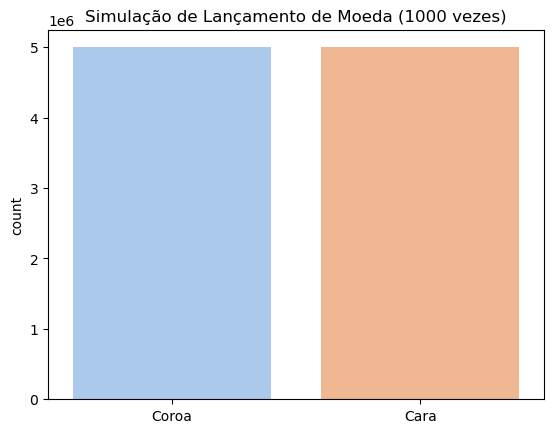

In [4]:
sns.countplot(x=resultados, palette="pastel")
plt.title("Simulação de Lançamento de Moeda (1000 vezes)")
plt.show()

## Lei dos Grandes Números

A **Lei dos Grandes Números** afirma que, conforme aumentamos o número de experimentos,
a média amostral tende a se aproximar da média esperada teórica.

Isso é fundamental em Machine Learning:
quanto **maior o conjunto de dados**, mais os parâmetros aprendidos refletem a **verdadeira distribuição** dos dados.

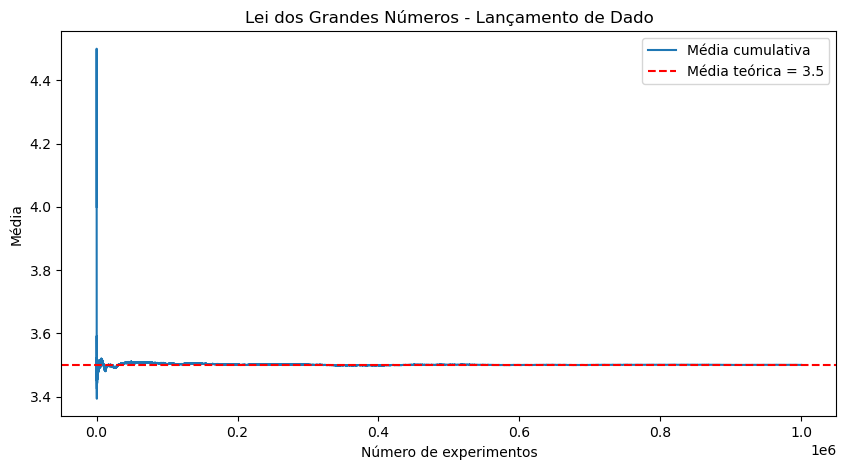

In [5]:
# Simulação: jogando um dado
np.random.seed(42)
n_experimentos = 1000000
resultados = np.random.randint(1, 7, n_experimentos)
media_cumulativa = np.cumsum(resultados) / np.arange(1, n_experimentos+1)

plt.figure(figsize=(10,5))
plt.plot(media_cumulativa, label="Média cumulativa")
plt.axhline(3.5, color="red", linestyle="--", label="Média teórica = 3.5")
plt.title("Lei dos Grandes Números - Lançamento de Dado")
plt.xlabel("Número de experimentos")
plt.ylabel("Média")
plt.legend()
plt.show()

## Distribuições de Probabilidade

Uma **distribuição de probabilidade** descreve como os valores de uma variável aleatória se distribuem.

Em IA:
- A **Distribuição Normal** modela ruído em dados e erros de previsão;
- A **Distribuição Uniforme** é usada na inicialização de pesos em redes neurais.





In [6]:
x = np.linspace(-4, 4, 1000)

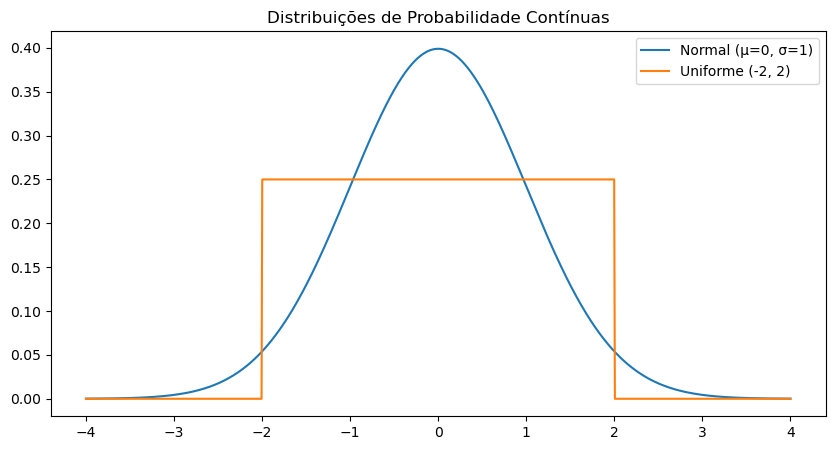

In [7]:
# Distribuição Normal
from scipy.stats import norm, uniform, bernoulli

plt.figure(figsize=(10,5))
plt.plot(x, norm.pdf(x, 0, 1), label="Normal (μ=0, σ=1)")
plt.plot(x, uniform.pdf(x, -2, 4), label="Uniforme (-2, 2)")
plt.title("Distribuições de Probabilidade Contínuas")
plt.legend()
plt.show()

Na prática de IA, o **ruído gaussiano** é comumente adicionado a dados ou pesos para regularização.
O conhecimento sobre distribuições ajuda a:
- Escolher funções de perda adequadas;
- Compreender o comportamento dos gradientes;
- Interpretar probabilidades de saída de modelos.

## Aplicações em Machine Learning

1. **Modelos Probabilísticos:** como Naive Bayes ou Regressão Logística baseiam-se em distribuições.  
2. **Regularização e Dropout:** assumem ruído (distribuição normal ou Bernoulli).  
3. **Redes Bayesianas:** utilizam probabilidade condicional para modelar relações entre variáveis.  
4. **Inferência Variacional:** aproxima distribuições complexas em modelos generativos.  

###  **Exercício 1 — Probabilidade básica (nível fácil)**

Um modelo de classificação de imagens acerta 8 de cada 10 previsões.

1. Qual é a probabilidade de o modelo errar uma previsão?



In [12]:
# Probabilidade de erro do modelo

acertos = 8
total_previsoes = 10

probabilidade_acerto = acertos / total_previsoes
probabilidade_erro = 1 - probabilidade_acerto

print("Probabilidade de acerto:", probabilidade_acerto)
print("Probabilidade de erro :", round(probabilidade_erro,2))


Probabilidade de acerto: 0.8
Probabilidade de erro : 0.2


2. Se ele fizer 5 previsões independentes, qual é a probabilidade de acertar todas?


In [14]:
probabilidade_acerto = 0.8
numero_previsoes = 5

probabilidade_acertar_todas = probabilidade_acerto ** numero_previsoes

print("Probabilidade de acertar todas as previsões:", round(probabilidade_acertar_todas, 2))


Probabilidade de acertar todas as previsões: 0.33


3. Interprete o resultado em termos de desempenho do modelo.



n	Probabilidade	(%)
1	0.800000	80.00%
2	0.640000	64.00%
3	0.512000	51.20%
4	0.409600	40.96%
5	0.327680	32.77%
6	0.262144	26.21%
7	0.209715	20.97%
8	0.167772	16.78%
9	0.134218	13.42%
10	0.107374	10.74%


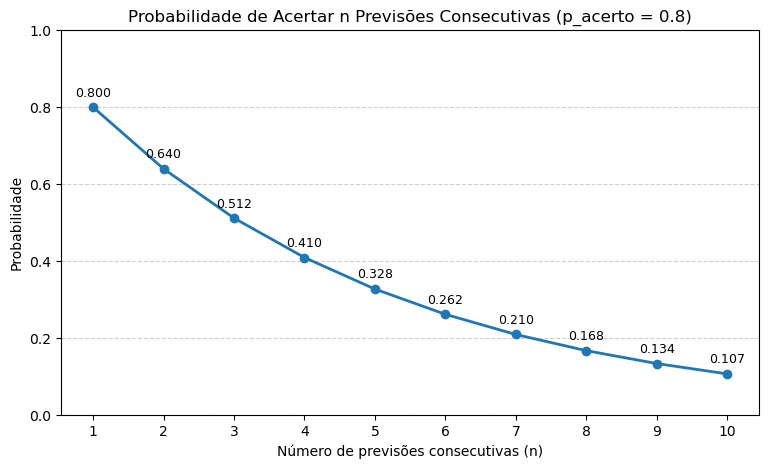

In [15]:
import matplotlib.pyplot as plt

# Probabilidade de acerto individual
prob_acerto = 0.8

# Valores de n (número de previsões consecutivas)
n_valores = list(range(1, 11))   # 1 a 10
probabilidades = [prob_acerto ** n for n in n_valores]

# Imprime tabela simples dos resultados
print("n\tProbabilidade\t(%)")
for n, p in zip(n_valores, probabilidades):
    print(f"{n}\t{p:.6f}\t{p*100:.2f}%")

# Plot
plt.figure(figsize=(9,5))
plt.plot(n_valores, probabilidades, marker='o', linewidth=2)
plt.title("Probabilidade de Acertar n Previsões Consecutivas (p_acerto = 0.8)")
plt.xlabel("Número de previsões consecutivas (n)")
plt.ylabel("Probabilidade")
plt.xticks(n_valores)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
# mostrar os valores no gráfico
for x, y in zip(n_valores, probabilidades):
    plt.text(x, y + 0.02, f"{y:.3f}", ha='center', va='bottom', fontsize=9)

plt.show()


---

### **Exercício 2 — Lei dos Grandes Números (nível médio)**

Simule, em Python, o lançamento de uma moeda justa (cara ou coroa) 10, 100, 1.000 e 10.000 vezes.

1. Calcule a proporção de caras em cada experimento.


In [16]:
import numpy as np

# Quantidades de lançamentos
quantidades = [10, 100, 1000, 10000]

print("Quantidade\tProporção de Caras")

for qtd in quantidades:
    # 1 = Cara, 0 = Coroa
    resultados = np.random.randint(0, 2, qtd)

    proporcao_caras = resultados.mean()

    print(f"{qtd}\t\t{proporcao_caras:.4f}")


Quantidade	Proporção de Caras
10		0.4000
100		0.5100
1000		0.5070
10000		0.5053


2. Faça um gráfico mostrando como essa proporção se aproxima de 0,5 à medida que o número de lançamentos cresce.


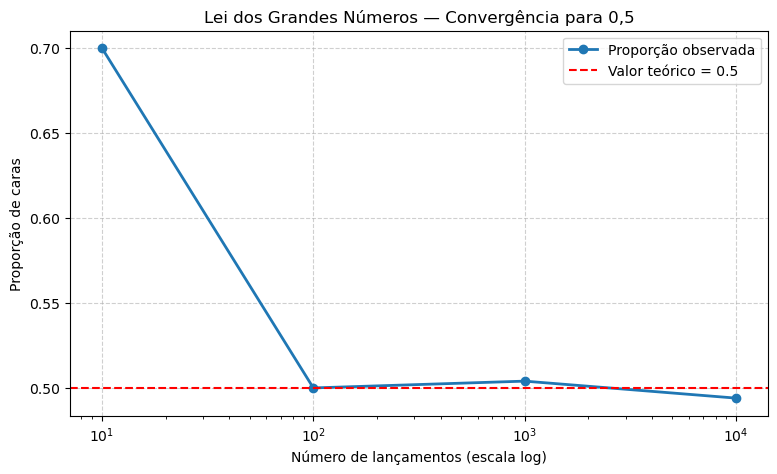

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Quantidades de lançamentos
quantidades = [10, 100, 1000, 10000]

proporcoes_caras = []

for qtd in quantidades:
    # 1 = Cara, 0 = Coroa
    resultados = np.random.randint(0, 2, qtd)
    proporcao = resultados.mean()
    proporcoes_caras.append(proporcao)


plt.figure(figsize=(9, 5))
plt.plot(quantidades, proporcoes_caras, marker='o', linewidth=2, label="Proporção observada")
plt.axhline(0.5, color='red', linestyle='--', label="Valor teórico = 0.5")

plt.xscale('log')  # eixo x em escala logarítmica (fica mais claro)
plt.xlabel("Número de lançamentos (escala log)")
plt.ylabel("Proporção de caras")
plt.title("Lei dos Grandes Números — Convergência para 0,5")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

3. Explique como o resultado ilustra a **Lei dos Grandes Números**.

 *Dica:* use `random.choice(['C','K'])` ou `np.random.randint(0,2)`.




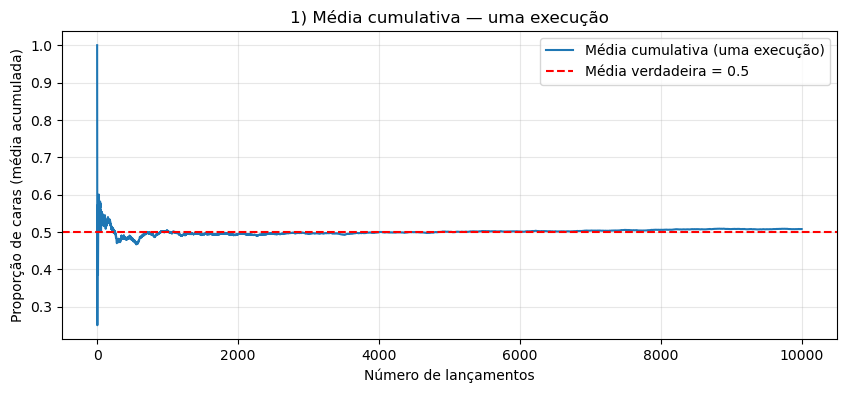

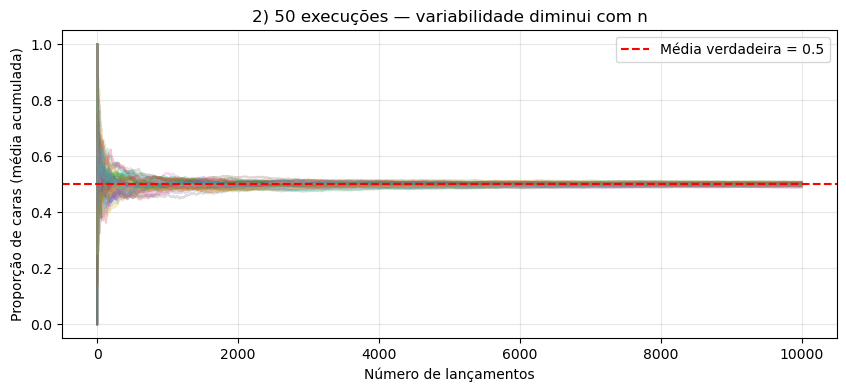

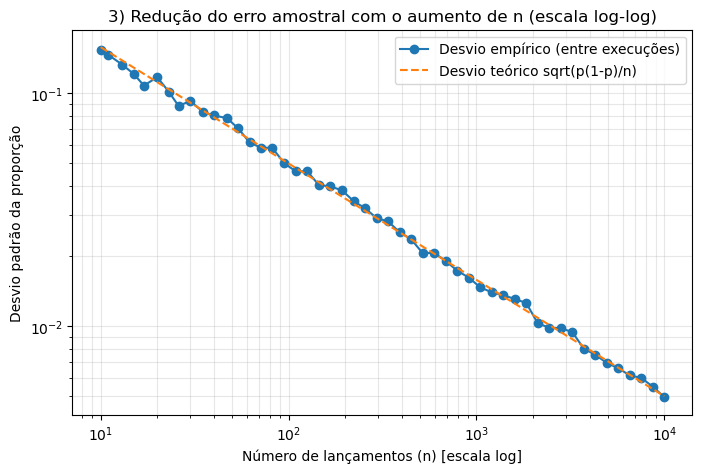

 n	Proporção média	Desvio empírico	Desvio teórico
    10	0.4935		0.1537		0.1581
    23	0.4848		0.1019		0.1043
    54	0.5004		0.0708		0.0680
   126	0.5012		0.0462		0.0445
   294	0.5002		0.0291		0.0292
   686	0.4998		0.0191		0.0191
  1599	0.5005		0.0131		0.0125
  3727	0.4993		0.0080		0.0082
  8685	0.5001		0.0055		0.0054

Interpretação (Lei dos Grandes Números):
- A média cumulativa de uma sequência de lançamentos tende a se aproximar da média verdadeira (0.5 aqui) à medida 
  que o número de lançamentos aumenta.
- Ao sobrepor muitas execuções independentes, vemos que embora trajetórias individuais oscilem muito quando n é pequeno,
  todas tendem a convergir para 0.5 quando n cresce.
- A variabilidade (erro amostral) da proporção final diminui aproximadamente como 1/sqrt(n), que é o comportamento
  visto na comparação entre o desvio empírico e o desvio teórico sqrt(p(1-p)/n).



In [19]:
# Lei dos Grandes Números — explicaçao por simulação (em português)
import random
import numpy as np
import matplotlib.pyplot as plt

# ---------- Parâmetros ----------
p_cara = 0.5                # probabilidade verdadeira de "cara" (moeda justa)
ns = [10, 100, 1000, 10000] # tamanhos para relatório (opcional)
n_max = 10000               # número máximo de lançamentos para a trajetória cumulativa
n_repeticoes = 50          # quantas execuções independentes para sobrepor
semente = 42               # semente para reprodutibilidade

# ---------- Função: gerar lançamentos (duas opções: random.choice ou np.random.randint) ----------
def gerar_lancamentos_numpy(qtd, p=p_cara):
    # retorna array de 0/1 (1=Cara, 0=Coroa)
    return (np.random.rand(qtd) < p).astype(int)

def gerar_lancamentos_random_choice(qtd, p=p_cara):
    # alternativa usando random.choice — retorna lista de 'C'/'K' ou 1/0
    # aqui retornamos 1 para Cara, 0 para Coroa
    resultados = []
    for _ in range(qtd):
        # usa p: se random.random() < p então 'Cara'
        resultados.append(1 if random.random() < p else 0)
    return np.array(resultados, dtype=int)

# ---------- 1) Trajetória da média cumulativa (uma execução) ----------
np.random.seed(semente)
random.seed(semente)

# escolha do método: descomente se preferir usar random.choice
# lancamentos = gerar_lancamentos_random_choice(n_max, p_cara)
lancamentos = gerar_lancamentos_numpy(n_max, p_cara)

media_cumulativa = np.cumsum(lancamentos) / np.arange(1, n_max + 1)

plt.figure(figsize=(10,4))
plt.plot(media_cumulativa, label="Média cumulativa (uma execução)")
plt.axhline(p_cara, color='red', linestyle='--', label=f"Média verdadeira = {p_cara}")
plt.xlabel("Número de lançamentos")
plt.ylabel("Proporção de caras (média acumulada)")
plt.title("1) Média cumulativa — uma execução")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ---------- 2) Várias execuções (sobrepor trajetórias) ----------
plt.figure(figsize=(10,4))
np.random.seed(semente)
for i in range(n_repeticoes):
    # cada repetição gera sua própria sequência
    seq = gerar_lancamentos_numpy(n_max, p_cara)
    media_cum = np.cumsum(seq) / np.arange(1, n_max + 1)
    plt.plot(media_cum, alpha=0.25)  # leve transparência para ver sobreposição

plt.axhline(p_cara, color='red', linestyle='--', label=f"Média verdadeira = {p_cara}")
plt.xlabel("Número de lançamentos")
plt.ylabel("Proporção de caras (média acumulada)")
plt.title(f"2) {n_repeticoes} execuções — variabilidade diminui com n")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ---------- 3) Comportamento do erro amostral com n (empírico vs teórico) ----------
# Para uma coleção de valores de n (1..n_max por passos ou ns especificados), calcule proporções finais em várias repetições
np.random.seed(semente)
lista_ns = np.unique(np.logspace(1, np.log10(n_max), 50, dtype=int))  # vetor de n escalonado log
proporcoes_medias = []   # média das proporções finais entre repetições
proporcoes_std = []      # desvio padrão empírico entre repetições

# para cada n, rodamos várias repetições e guardamos a proporção final (n lançamentos)
reps = 200  # número de repetições para estimar variância empírica (aumente se tiver tempo)
for n in lista_ns:
    finais = []
    for _ in range(reps):
        seq = gerar_lancamentos_numpy(n, p_cara)
        finais.append(seq.mean())
    finais = np.array(finais)
    proporcoes_medias.append(finais.mean())
    proporcoes_std.append(finais.std(ddof=1))

proporcoes_medias = np.array(proporcoes_medias)
proporcoes_std = np.array(proporcoes_std)
desvio_teorico = np.sqrt(p_cara * (1 - p_cara) / lista_ns)  # sigma / sqrt(n) onde sigma^2 = p(1-p)

plt.figure(figsize=(8,5))
plt.loglog(lista_ns, proporcoes_std, marker='o', label='Desvio empírico (entre execuções)')
plt.loglog(lista_ns, desvio_teorico, linestyle='--', label='Desvio teórico sqrt(p(1-p)/n)')
plt.xlabel("Número de lançamentos (n) [escala log]")
plt.ylabel("Desvio padrão da proporção")
plt.title("3) Redução do erro amostral com o aumento de n (escala log-log)")
plt.legend()
plt.grid(which='both', alpha=0.3)
plt.show()

# Imprime tabela resumida para alguns ns escolhidos (opcional)
print(" n\tProporção média\tDesvio empírico\tDesvio teórico")
for n, pm, sd, dt in zip(lista_ns[::6], proporcoes_medias[::6], proporcoes_std[::6], desvio_teorico[::6]):
    print(f"{n:6d}\t{pm:.4f}\t\t{sd:.4f}\t\t{dt:.4f}")

# ---------- Mensagem explicativa (texto) ----------
explicacao = """
Interpretação (Lei dos Grandes Números):
- A média cumulativa de uma sequência de lançamentos tende a se aproximar da média verdadeira (0.5 aqui) à medida 
  que o número de lançamentos aumenta.
- Ao sobrepor muitas execuções independentes, vemos que embora trajetórias individuais oscilem muito quando n é pequeno,
  todas tendem a convergir para 0.5 quando n cresce.
- A variabilidade (erro amostral) da proporção final diminui aproximadamente como 1/sqrt(n), que é o comportamento
  visto na comparação entre o desvio empírico e o desvio teórico sqrt(p(1-p)/n).
"""
print(explicacao)


---

### **Exercício 3 — Distribuição de probabilidade (nível médio)**

Considere que o tempo (em segundos) que um sensor leva para responder segue uma **distribuição normal** com média 2.0 e desvio padrão 0.3.

1. Gere 1.000 amostras simuladas dessa distribuição.


In [20]:
import numpy as np

media = 2.0
desvio_padrao = 0.3
quantidade_amostras = 1000

amostras = np.random.normal(media, desvio_padrao, quantidade_amostras)

print(amostras[:10])  # mostra só os 10 primeiros valores


[2.02634377 2.18859315 2.76071803 1.37001085 1.78800908 2.03304737
 1.55466866 2.28116533 2.48105378 1.82684656]


2. Plote o histograma das amostras e sobreponha a curva teórica da Normal.


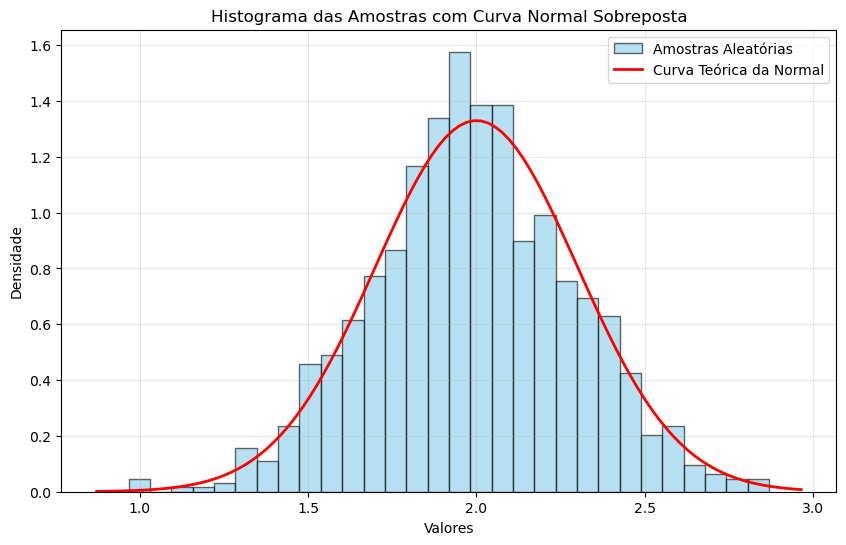

In [21]:


# 2. Plotar
plt.figure(figsize=(10, 6))

# Histograma
# density=True normaliza os dados para que a área sob o histograma seja 1
count, bins, ignored = plt.hist(amostras, bins=30, density=True, 
                                alpha=0.6, color='skyblue', edgecolor='black', 
                                label='Amostras Aleatórias')

# Curva Teórica
# Geramos pontos x de acordo com os limites do histograma
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
# Calculamos a probabilidade teórica (PDF) para esses pontos
p = norm.pdf(x, media, desvio_padrao)

plt.plot(x, p, 'r', linewidth=2, label='Curva Teórica da Normal')

plt.title('Histograma das Amostras com Curva Normal Sobreposta')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

3. Calcule a probabilidade de o tempo ser maior que 2.5 segundos.


In [22]:
import numpy as np
from scipy.stats import norm

media = 2.0
desvio_padrao = 0.3
limite = 2.5

# 1. Cálculo Teórico
# A probabilidade é a área sob a curva à direita de 2.5.
# Usamos a "Survival Function" (sf), que equivale a 1 - CDF.
prob_teorica = norm.sf(limite, loc=media, scale=desvio_padrao)

print(f"Probabilidade Teórica: {prob_teorica:.4%}")

# 2. Cálculo Empírico (baseado nas amostras geradas)
# Contamos quantos valores são maiores que 2.5 e dividimos pelo total
# (Assumindo que 'amostras' já foi gerado anteriormente)
prob_empirica = np.mean(amostras > limite)

print(f"Probabilidade Empírica: {prob_empirica:.4%}")

Probabilidade Teórica: 4.7790%
Probabilidade Empírica: 4.0000%


4. Explique como distribuições probabilísticas podem ser úteis para modelar ruído em sensores de IA.

*Dica:* use `numpy.random.normal` e `scipy.stats.norm`.

Leituras simuladas (primeiras 5): [10.05781786 10.09825411 10.39695443 10.52889793 11.06573521]
Probabilidade dessa leitura ser apenas ruído: 0.1350%


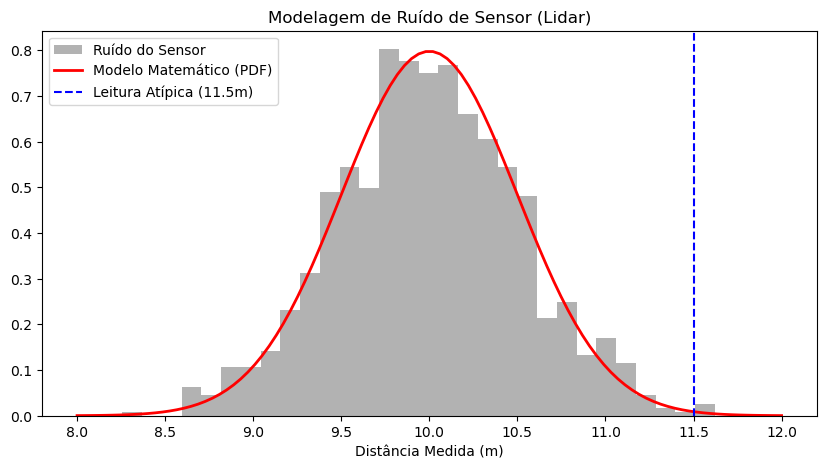

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Configuração do Cenário
distancia_real = 10.0  # O obstáculo está realmente a 10m
erro_sensor = 0.5      # O sensor tem um desvio padrão (ruído) de 0.5m
n_leituras = 1000      # O sensor faz 1000 leituras por segundo/minuto

# 2. Simulando o Ruído (Gerando dados como se fosse o robô)
# A IA usa isso para treinar em ambientes simulados
leituras_sensor = np.random.normal(distancia_real, erro_sensor, n_leituras)

# 3. Analisando a Incerteza (O cérebro da IA)
# Imagine que o sensor leu 11.5m. A IA deve frear?
leitura_atual = 11.5

# Qual a probabilidade de obtermos uma leitura de 11.5m (ou maior) 
# SE o objeto estivesse realmente a 10m?
probabilidade_erro = norm.sf(leitura_atual, loc=distancia_real, scale=erro_sensor)

print(f"Leituras simuladas (primeiras 5): {leituras_sensor[:5]}")
print(f"Probabilidade dessa leitura ser apenas ruído: {probabilidade_erro:.4%}")

# Visualização
plt.figure(figsize=(10, 5))
plt.hist(leituras_sensor, bins=30, density=True, alpha=0.6, color='gray', label='Ruído do Sensor')
x = np.linspace(8, 12, 100)
plt.plot(x, norm.pdf(x, distancia_real, erro_sensor), 'r-', lw=2, label='Modelo Matemático (PDF)')
plt.axvline(leitura_atual, color='blue', linestyle='--', label='Leitura Atípica (11.5m)')
plt.title('Modelagem de Ruído de Sensor (Lidar)')
plt.xlabel('Distância Medida (m)')
plt.legend()
plt.show()